# Cutting Data 

## (aka how to make your Stream Pop Out in the Data)

### Let's use GD-1 as an example:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import galstreams
import gala
from astropy.table import Table

In [2]:
t = Table.read('/Users/Tavangar/Work/CATS_Workshop/data/GaiaDR3-GD-1-all.fits')

In [4]:
t

source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,ruwe,astrometric_matched_transits,phi1,phi2
int64,float64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float64,float64
576746900204578048,134.1785813868115,0.699903607168702,-0.387859966874895,1.0570223,0.8404360533051543,0.9320573,-2.5274593467993127,0.8070885,-0.20866951,-0.14958516,-0.0032666726,-0.02912248,0.02797563,-0.22435276,0.44840333,-0.20133851,-0.39092532,20.712267,136.26375,21.587004,5.5443625,19.724636,14.926739,0.93803054,31,-77.49584072096819,-7.957764485261657
576747007581207424,134.1937825126647,0.7203154579385792,0.44567563666171195,0.054363452,-8.233278145657213,0.05265684,3.3074368903596247,0.041687418,0.04580415,-0.008941007,0.012456373,0.0688402,0.044549335,-0.2622334,0.2989002,-0.04114594,-0.22885668,16.27391,2113.4995,16.61417,330.37082,15.770839,420.26526,0.99800134,51,-77.47030898495994,-7.960647433209825
576747110659192064,134.19509489035744,0.7237244085353892,0.5420165918753204,0.046713714,-9.358144465692384,0.04782798,-8.430471717130894,0.03488169,0.08713422,-0.0050627645,-0.005285966,0.08358605,-0.0020849484,-0.26530662,0.15036698,-0.11948693,-0.08576689,15.866391,3007.8508,16.19205,537.6066,15.368745,486.4888,0.9832779,49,-77.46666723391706,-7.9600686305055515
576747862277265408,134.1894707418727,0.7381690523969195,-2.7763415157065405,1.0521361,-2.938199452746094,1.082989,1.1067058314720313,0.97168803,-0.19492742,0.35428882,-0.14690888,-0.07634112,-0.032475024,0.09032123,-0.030825453,0.12878764,-0.3337938,20.69803,128.11299,20.864492,7.007613,19.731596,11.190689,0.98864704,32,-77.4569122030593,-7.947946947766934
576747999716218112,134.13497786982722,0.7345795938669274,-0.9625065097830379,0.4296084,-0.1538215014054048,0.41849974,0.47644022186327895,0.29298583,-0.04797209,-0.122631036,0.05562415,0.10437983,0.05257021,-0.2928555,0.33194298,-0.17539486,-0.04332959,19.879208,305.36304,20.314053,20.340523,19.187998,36.776653,1.0310991,56,-77.48769384685971,-7.902643848638069
576747999717632896,134.1384960693169,0.7420892943183262,-2.109908457382253,0.89431924,-0.35189727962294914,0.82498246,-1.712770532331728,0.57707155,-0.2189089,-0.28331998,-0.010239677,0.21864711,0.04230801,-0.295861,0.3566791,-0.23168539,-0.046540905,20.530268,167.98485,21.491016,6.959222,19.481632,17.219328,1.0731905,39,-77.47935422807508,-7.901911291792226
576748068435698048,134.13841688083966,0.744322167695016,0.2984067087733031,0.0703053,-3.8139182053063028,0.06819834,-4.5132924531099246,0.047343124,0.056212936,-0.09234336,-0.020601856,0.16351864,0.03781591,-0.2740701,0.32953483,-0.2281111,-0.08119383,16.797646,1971.64,17.151026,164.42722,16.287083,325.6407,0.970057,53,-77.47744548223775,-7.900720690605858
576748072731855744,134.1236461656052,0.7481797174505787,0.6674381730202374,0.1691354,-6.039117165561318,0.16205291,-3.2367818812055518,0.115056016,0.018368728,-0.20091957,0.03227078,0.31871125,0.1462061,-0.40547597,0.36588413,-0.33380383,-0.17522073,16.194178,703.619,16.499783,286.88138,15.6146345,487.07104,3.126195,57,-77.48157198157377,-7.88601318052835
576748102795443328,134.13808366256384,0.7600799922555111,0.20006748680352565,0.36626935,-0.9400520123679159,0.37520215,-0.7778107838411781,0.25151613,0.22618929,-0.25737563,-0.19029732,0.10707875,-0.07744596,-0.33246422,0.2202615,-0.30876538,0.08842465,19.515024,401.51263,20.232538,24.140078,18.817604,42.605305,0.9906685,53,-77.46386092778522,-7.8925131871725664


Let's plot some maybe relevant things:

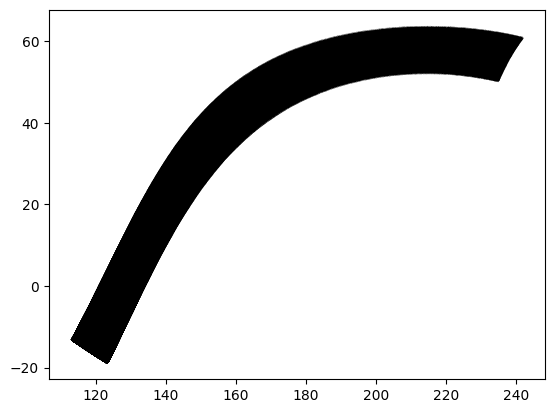

In [14]:
plt.scatter(t['ra'], t['dec'], s=1e-4, c='k')
plt.show()

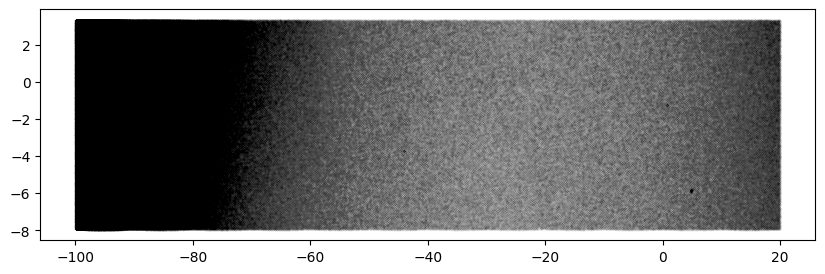

In [13]:
plt.figure(figsize=(10,3))
plt.scatter(t['phi1'], t['phi2'], s = 1e-4, c='k')
plt.show()

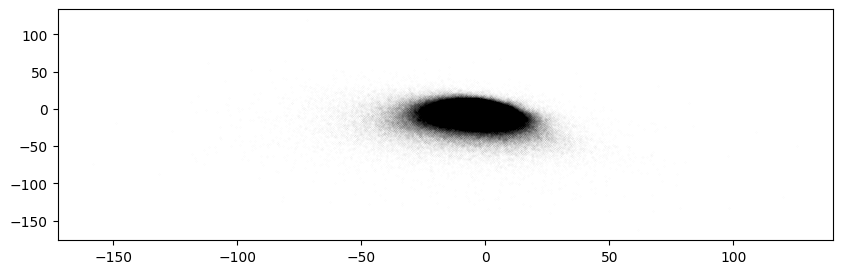

In [15]:
plt.figure(figsize=(10,3))
plt.scatter(t['pmra'], t['pmdec'], s = 1e-4, c='k')
plt.show()

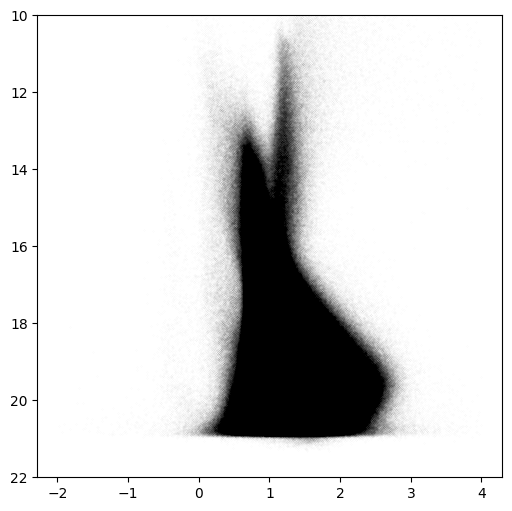

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(t['phot_bp_mean_mag'] - t['phot_rp_mean_mag'], t['phot_g_mean_mag'], s = 1e-4, c='k')
plt.ylim(22, 10)
plt.show()

And we can also plot some not relevant ones:

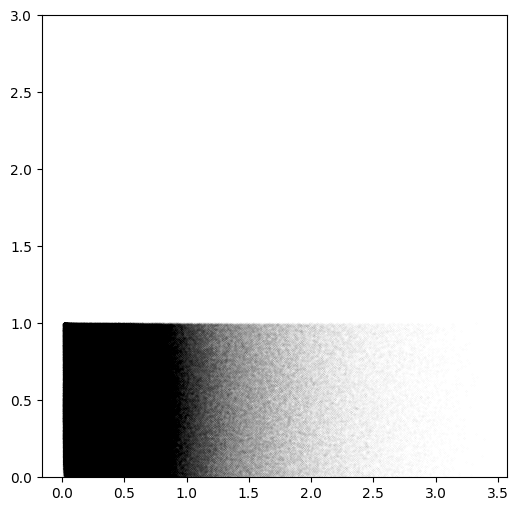

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(t['pmra_error'], t['parallax'], s=1e-4, c='k')
plt.ylim(0, 3)
plt.show()

Obviously this is way too many points. Makes sense because we selected everything in a certain part of the sky and the stream is only a very small part of that. (maybe about 1000 stars out of 6000000)

So we need a way to eliminate most of the points.

### A Toy Example

To illustrate how to do this, let me take a random set of points in two dimensions:

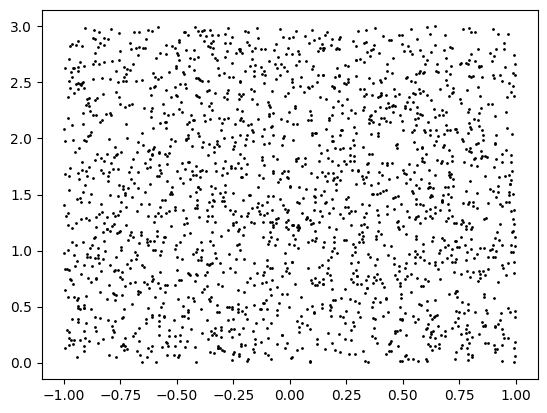

In [27]:
xs = np.random.uniform(-1, 1, 2000)
ys = np.random.uniform(0, 3, 2000)

plt.scatter(xs, ys, s=1, c='k')

But let's say that for whatever reason I am only interested in the region shown below.

(0.0, 3.0)

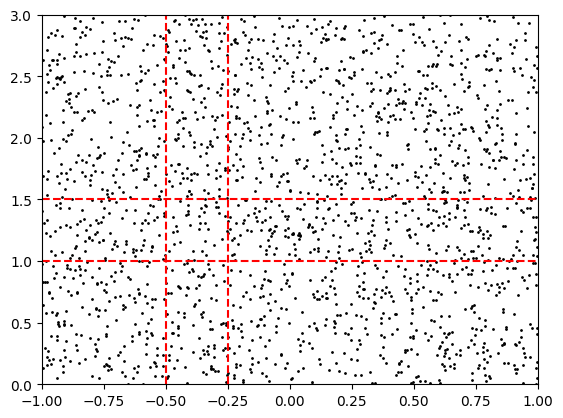

In [33]:
plt.scatter(xs, ys, s=1, c='k')
plt.hlines([1, 1.5], -1, 1, ls='dashed', color='r')
plt.vlines([-0.5, -0.25], 0, 3, ls='dashed', color='r')
plt.xlim(-1, 1)
plt.ylim(0,3)

Conceptually, all I will do is define a polygon with those vertices and then only select points inside that polygon.

First, define the vertices of the polygon:

In [36]:
poly_vertices = np.array([[-0.5, 1],
                 [-0.5, 1.5],
                 [-0.25, 1.5],
                 [-0.25, 1]])

In [42]:
import matplotlib as mpl

on_poly_patch = mpl.patches.Polygon(poly_vertices, 
                                    facecolor="none", edgecolor="g", linewidth=5 # these are just for visualization
                                   )

(0.0, 3.0)

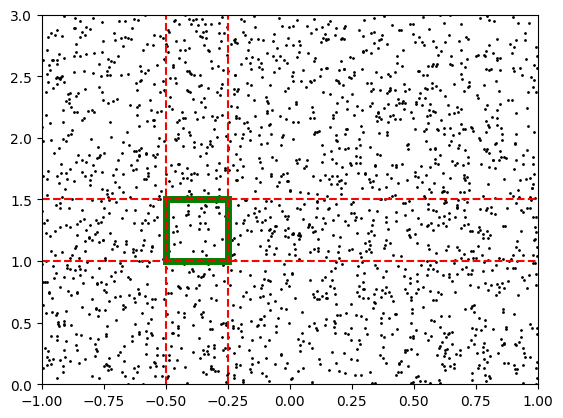

In [43]:
# Let's visualize this:

fig, ax = plt.subplots()
ax.scatter(xs, ys, s=1, c='k')
ax.hlines([1, 1.5], -1, 1, ls='dashed', color='r')
ax.vlines([-0.5, -0.25], 0, 3, ls='dashed', color='r')
ax.add_patch(on_poly_patch)
ax.set_xlim(-1, 1)
ax.set_ylim(0,3)

Now we select the points:

In [47]:
points = np.vstack((xs, ys)).T # put the points in the same format (2D coordinates)
in_poly = on_poly_patch.get_path().contains_points(points)
in_poly

array([False, False, False, ..., False, False, False])

The `in_poly` array now is a Boolean array of whether the point is in the rectangle.

Let's plot!

(0.0, 3.0)

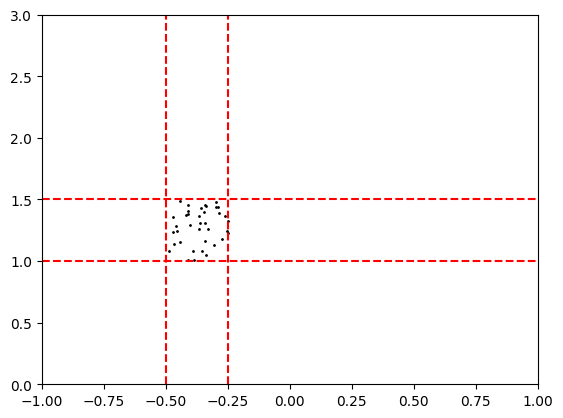

In [49]:
fig, ax = plt.subplots()
ax.scatter(xs[in_poly], ys[in_poly], s=1, c='k')
ax.hlines([1, 1.5], -1, 1, ls='dashed', color='r')
ax.vlines([-0.5, -0.25], 0, 3, ls='dashed', color='r')
ax.set_xlim(-1, 1)
ax.set_ylim(0,3)

**Done**

To be clear, you don't have to do this with rectangles. Any polygon will do

Now see if you can apply this to your stream. Think about how you might be able to use this. Any ideas?